# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [5]:
# Import warnings
import warnings


In [4]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# pip install --upgrade matplotlib==3.10.0

In [9]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file

df = pd.read_parquet('Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

root_dir = os.getcwd()
# Select the folder having data files
data_dir = os.path.join(root_dir, 'Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
#file_list = os.listdir(data_dir)
file_list = [file for file in os.listdir(data_dir) if file.endswith('.parquet')]


# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(data_dir, file_name)
        
        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        monthly_data["tpep_pickup_datetime"] = pd.to_datetime(monthly_data["tpep_pickup_datetime"])
        # Filter data to include only records from 2023
        monthly_data = monthly_data[monthly_data['tpep_pickup_datetime'].dt.year == 2023]
        
        monthly_data["date"] = monthly_data["tpep_pickup_datetime"].dt.date
        monthly_data["hour"] = monthly_data["tpep_pickup_datetime"].dt.hour
        
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['date'].unique():
            date_data = monthly_data[monthly_data['date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]
                # Sample 0.008% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.008, random_state=42)
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        print(f"Processed file: {file_name}")
    
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
# 1% sampling → 379,268 rows

Processed file: 2023-12.parquet
Processed file: 2023-6.parquet
Processed file: 2023-7.parquet
Processed file: 2023-5.parquet
Processed file: 2023-11.parquet
Processed file: 2023-10.parquet
Processed file: 2023-4.parquet
Processed file: 2023-1.parquet
Processed file: 2023-8.parquet
Processed file: 2023-9.parquet
Processed file: 2023-2.parquet
Processed file: 2023-3.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [19]:
print(f"Final sampled data shape: {df.shape}")

Final sampled data shape: (303397, 22)


In [21]:
target_rows = 275000  # mid target range (optional)

if len(df) > target_rows:
    df = df.sample(n=target_rows, random_state=42)
len(df)

275000

In [23]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('sampled_NYC_Taxi.parquet')
print("Sampling completed. Data saved as 'sampled_NYC_Taxi.parquet'.")

Sampling completed. Data saved as 'sampled_NYC_Taxi.parquet'.


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [461]:
# Load the new data file
df = pd.read_parquet('sampled_NYC_Taxi.parquet')
df.shape

(275000, 22)

In [463]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2771670         2  2023-12-26 16:17:15   2023-12-26 16:33:10              2.0   
1622940         2  2023-11-15 11:25:08   2023-11-15 11:51:39              1.0   
2752560         2  2023-11-26 19:33:45   2023-11-26 19:38:59              1.0   
827194          2  2023-11-08 12:42:07   2023-11-08 13:21:00              1.0   
1446028         1  2023-02-15 10:25:29   2023-02-15 10:50:43              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2771670           3.86         1.0                  N            13   
1622940          12.12         1.0                  N            70   
2752560           0.73         1.0                  N           162   
827194           11.51         1.0                  N           161   
1446028           1.40         1.0                  N           186   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
2771670            48             1  ...      0.5        5.40          0.00   
1622940           132             1  ...      0.5       11.00          0.00   
2752560           237             1  ...      0.5        2.24          0.00   
827194            138             1  ...      0.5       14.15          6.94   
1446028           170             1  ...      0.5        4.05          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
2771670                    1.0         32.40                   2.5   
1622940                    1.0         67.75                   0.0   
2752560                    1.0         13.44                   2.5   
827194                     1.0         84.89                   2.5   
1446028                    1.0         24.35                   2.5   

         Airport_fee        date  hour airport_fee  
2771670         0.00  2023-12-26    16         NaN  
1622940         1.75  2023-11-15    11         NaN  
2752560         0.00  2023-11-26    19         NaN  
827194          0.00  2023-11-08    12         NaN  
1446028         0.00  2023-02-15    10         NaN  

[5 rows x 22 columns]

In [465]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275000 entries, 2771670 to 1942185
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               275000 non-null  int64         
 1   tpep_pickup_datetime   275000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  275000 non-null  datetime64[us]
 3   passenger_count        265775 non-null  float64       
 4   trip_distance          275000 non-null  float64       
 5   RatecodeID             265775 non-null  float64       
 6   store_and_fwd_flag     265775 non-null  object        
 7   PULocationID           275000 non-null  int64         
 8   DOLocationID           275000 non-null  int64         
 9   payment_type           275000 non-null  int64         
 10  fare_amount            275000 non-null  float64       
 11  extra                  275000 non-null  float64       
 12  mta_tax                275000 non-null  fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [467]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [469]:
df[['Airport_fee', 'airport_fee']].describe()

Airport_fee   airport_fee
count  244204.000000  21571.000000
mean        0.145011      0.109986
std         0.471839      0.354106
min        -1.750000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.750000      1.250000

In [471]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])
# Remove duplicate column airport_fee
df.drop(columns=['airport_fee'], inplace=True, errors='ignore')  


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [473]:
# check where values of fare amount are negative
negative_fare_amount = df['fare_amount'].lt(0).sum()
print(f"Number of negative fare amount: {negative_fare_amount}")


Number of negative fare amount: 0


Did you notice something different in the `RatecodeID` column for above records?

In [475]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df['fare_amount'] < 0]

negative_RatecodeID = negative_fares['RatecodeID'].lt(0).sum()
print(f"Number of negative RatecodeID: {negative_RatecodeID}")


Number of negative RatecodeID: 0


In [477]:
# Find which columns have negative values
negative_values = df.select_dtypes(include=['int', 'float']).lt(0).sum()
columns_with_negatives = negative_values[negative_values > 0]

print(f"Columns with negative values and their counts:\n\n{columns_with_negatives}")


Columns with negative values and their counts:

extra                    1
mta_tax                  9
improvement_surcharge    9
total_amount             9
congestion_surcharge     6
Airport_fee              1
dtype: int64


In [479]:
# fix these negative values
df[columns_with_negatives.index] = df[columns_with_negatives.index].apply(lambda x: x.abs())

In [481]:
negative_values = df.select_dtypes(include=['int', 'float']).lt(0).sum()
print(f"Columns and count of the negative values:\n\n{negative_values}")


Columns and count of the negative values:

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
hour                     0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [483]:
# Find the proportion of missing values in each column
missing_values = df.isnull().mean()
print(missing_values)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033545
trip_distance            0.000000
RatecodeID               0.033545
store_and_fwd_flag       0.033545
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033545
Airport_fee              0.033545
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [485]:
# Display the rows with null values
rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6              2  2023-04-17 08:58:07   2023-04-17 09:18:34              NaN   
14             2  2023-11-05 04:47:03   2023-11-05 05:00:23              NaN   
107            1  2023-09-22 17:55:03   2023-09-22 18:09:02              NaN   
190            2  2023-02-11 03:46:51   2023-02-11 04:03:39              NaN   
208            1  2023-11-07 09:43:31   2023-11-07 09:48:29              NaN   
...          ...                  ...                   ...              ...   
274889         2  2023-04-24 14:10:18   2023-04-24 14:39:23              NaN   
274900         2  2023-11-09 19:17:53   2023-11-09 19:34:22              NaN   
274917         2  2023-12-13 08:02:07   2023-12-13 08:12:50              NaN   
274952         2  2023-09-01 15:56:56   2023-09-01 16:46:08              NaN   
274965         1  2023-09-03 11:45:39   2023-09-03 11:59:45              NaN   

        trip_distance  RatecodeID store

In [487]:
# Impute NaN values in 'passenger_count'
missing_passenger_count = df['passenger_count'].isnull().sum()
print(missing_passenger_count)

9225


Did you find zeroes in passenger_count? Handle these.

In [489]:
df.dropna(subset=['passenger_count'], inplace=True)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [491]:
# Fix missing values in 'RatecodeID'
missing_RatecodeID = df['RatecodeID'].isnull().sum()
print(missing_RatecodeID)

0


In [493]:
df['RatecodeID'].describe()

count    265775.000000
mean          1.657861
std           7.545261
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64

In [2]:
# df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

In [497]:
missing_RatecodeID = df['RatecodeID'].isnull().sum()
print(missing_RatecodeID)

0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [499]:
# handle null values in congestion_surcharge
missing_congestion_surcharge = df['congestion_surcharge'].isnull().sum()
print(missing_congestion_surcharge)

0


In [99]:
# df['congestion_surcharge']=df['congestion_surcharge'].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [501]:
# Handle any remaining missing values
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
date                     0
hour                     0
dtype: int64

In [104]:
# df['Airport_fee']=df['Airport_fee'].fillna(0)

In [106]:
# df['store_and_fwd_flag']= df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

In [108]:
# df.isnull().sum()

In [503]:
df.to_parquet('sampled_data_handled_missing_data.parquet')

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [505]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  265775.000000                      265775                      265775   
mean        1.737342  2023-07-01 20:28:22.307888  2023-07-01 20:45:36.143903   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000         2023-04-01 21:14:04         2023-04-01 21:30:50   
50%         2.000000         2023-06-26 06:01:07         2023-06-26 06:16:04   
75%         2.000000  2023-10-05 18:00:43.500000  2023-10-05 18:22:22.500000   
max         2.000000         2023-12-31 23:53:18         2024-01-01 20:14:57   
std         0.440079                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    265775.000000  265775.000000  265775.000000  265775.000000   
mean          1.367431       3.436097       1.657861     165.370434   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.060000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.360000       1.000000     234.000000   
max           9.000000     187.350000      99.000000     265.000000   
std           0.891452       4.525260       7.545261      63.759949   

        DOLocationID   payment_type    fare_amount          extra  \
count  265775.000000  265775.000000  265775.000000  265775.000000   
mean      164.169230       1.204993      19.721986       1.633702   
min         1.000000       1.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     910.000000      14.250000   
std        69.730658       0.466029      18.302766       1.829347   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  265775.000000  265775.000000  265775.000000          265775.000000   
mean        0.495424       3.573815       0.590754               0.999345   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.450000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.047694       4.061217       2.172522               0.023735   

        total_amount  congestion_surcharge    Airport_fee           hour  
count  265775.000000         265775.000000  265775.000000  265775.000000  
mean       28.838867              2.308522       0.142181      14.303336  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000       0.000000      11.000000  
50%        21.000000              2.500000       0.000000      15.000000  
75%        30.620000              2.500000       0.000000      19.000000  
max       911.000000              2.500000       1.750000      23.000000  
std        22.892486              0.664855       0.463494       5.773088

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [507]:
# remove passenger_count > 6
df = df[df['passenger_count'] < 7]

In [509]:
# Continue with outlier handling
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
# Entries where trip_distance is more than 250 miles.
df = df[df['trip_distance'] <= 100]
# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[df['payment_type'] != 0]


In [511]:
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  265757.000000                      265757                      265757   
mean        1.737343  2023-07-01 20:27:09.681664  2023-07-01 20:44:23.506221   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000         2023-04-01 21:11:38         2023-04-01 21:30:28   
50%         2.000000         2023-06-26 06:02:53         2023-06-26 06:16:26   
75%         2.000000         2023-10-05 17:59:48         2023-10-05 18:20:25   
max         2.000000         2023-12-31 23:53:18         2024-01-01 20:14:57   
std         0.440079                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    265757.000000  265757.000000  265757.000000  265757.000000   
mean          1.367302       3.435049       1.657326     165.370361   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.060000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.360000       1.000000     234.000000   
max           6.000000      75.500000      99.000000     265.000000   
std           0.890985       4.506607       7.543114      63.758233   

        DOLocationID   payment_type    fare_amount          extra  \
count  265757.000000  265757.000000  265757.000000  265757.000000   
mean      164.166712       1.204954      19.710644       1.633806   
min         1.000000       1.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     455.200000      14.250000   
std        69.728029       0.465952      18.132338       1.829363   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  265757.000000  265757.000000  265757.000000          265757.000000   
mean        0.495448       3.573922       0.590569               0.999360   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.450000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.047569       4.061156       2.171822               0.023417   

        total_amount  congestion_surcharge    Airport_fee           hour  
count  265757.000000         265757.000000  265757.000000  265757.000000  
mean       28.827669              2.308641       0.142178      14.303458  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000       0.000000      11.000000  
50%        21.000000              2.500000       0.000000      15.000000  
75%        30.620000              2.500000       0.000000      19.000000  
max       488.700000              2.500000       1.750000      23.000000  
std        22.759327              0.664666       0.463488       5.773054

In [125]:
# Do any columns need standardising?

total_amount, tolls_amount, tip_amount, fare_amount, trip_distance

# columns_to_standardize = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [513]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? Numerical


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [515]:
df.rename(columns={'date': 'pickup_date'}, inplace=True)
df.rename(columns={'hour': 'pickup_hour'}, inplace=True)
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

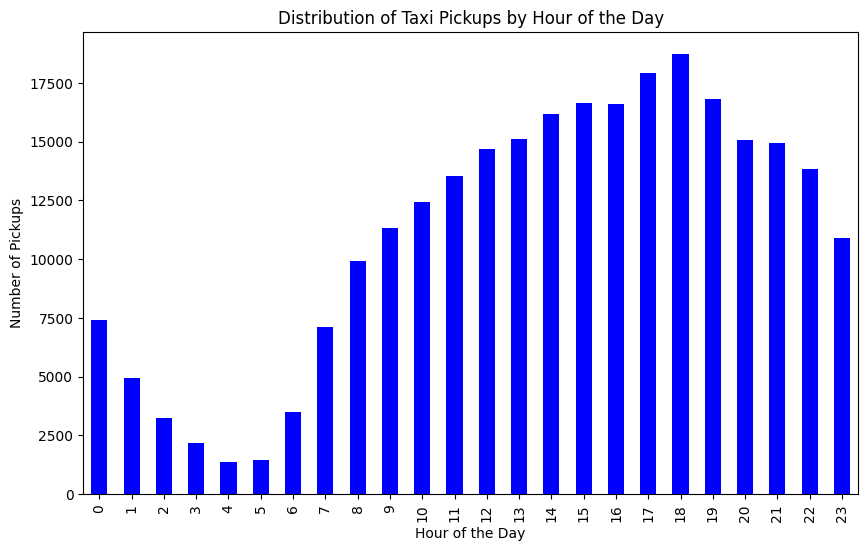

In [517]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(10, 6))
hourly_counts = df['pickup_hour'].value_counts().sort_index(ascending=True)
hourly_counts.plot.bar(color = 'blue')
plt.title('Distribution of Taxi Pickups by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()


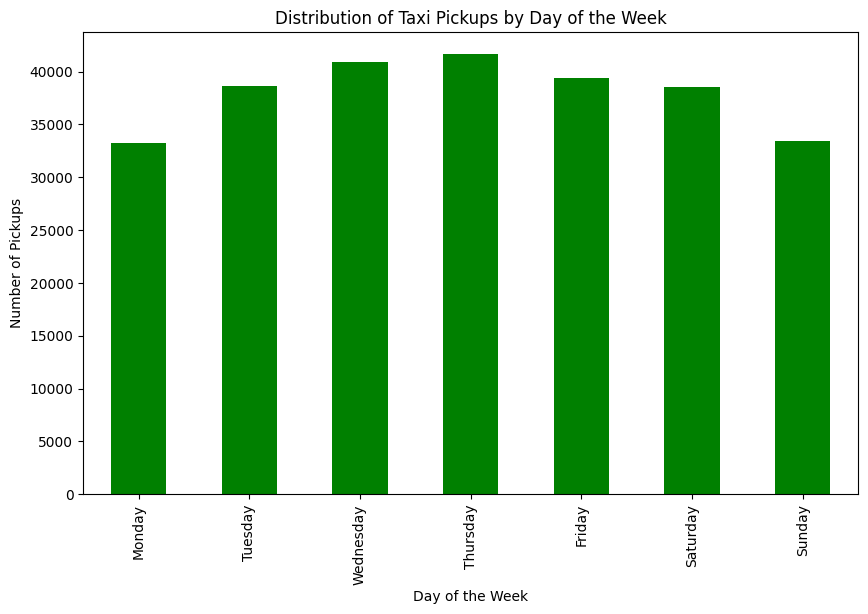

In [519]:
# Find and show the daily trends in taxi pickups (days of the week)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['pickup_day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
day_counts.plot.bar(color = 'green')
plt.title('Distribution of Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()


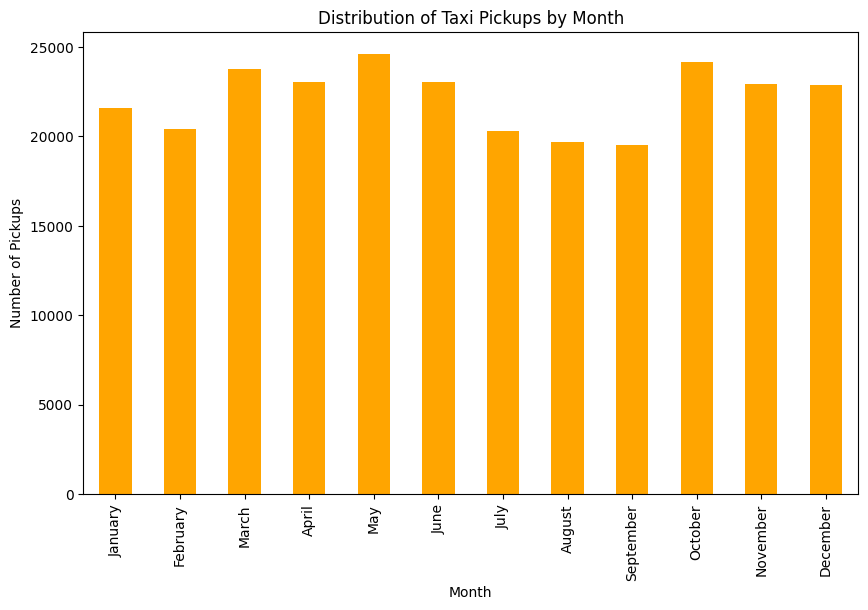

In [521]:
# Show the monthly trends in pickups
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['pickup_month'].value_counts().reindex(month_order)

plt.figure(figsize=(10, 6))
month_counts.plot.bar(color = 'orange')
plt.title('Distribution of Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [523]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df[columns_to_check].describe()

fare_amount     tip_amount   total_amount  trip_distance
count  265757.000000  265757.000000  265757.000000  265757.000000
mean       19.710644       3.573922      28.827669       3.435049
std        18.132338       4.061156      22.759327       4.506607
min         0.000000       0.000000       0.000000       0.000000
25%         9.300000       1.000000      15.960000       1.060000
50%        13.500000       2.860000      21.000000       1.790000
75%        21.900000       4.450000      30.620000       3.360000
max       455.200000     150.290000     488.700000      75.500000

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes. For better data analysis, it is beneficial to create a copy of the data. It is beneficial as the zero values in the fare_amount, total_amount where the trip_distance does not provide meaningful insights

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [525]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[
    (df['fare_amount'] != 0) & 
    (df['total_amount'] != 0) & 
    ((df['trip_distance'] != 0) | (df['PULocationID'] == df['DOLocationID']))
]

In [527]:
print("Original data: ", df.shape)
print("Non Zero Data: ",df_non_zero.shape)

Original data:  (265757, 23)
Non Zero Data:  (264574, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [529]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_non_zero.groupby('pickup_month')['total_amount'].sum().reset_index()
print(monthly_revenue)

   pickup_month  total_amount
0         April     655916.33
1        August     567834.66
2      December     657382.77
3      February     555603.13
4       January     589263.40
5          July     578663.71
6          June     671635.64
7         March     666352.14
8           May     718618.36
9      November     658834.79
10      October     718889.29
11    September     585627.09


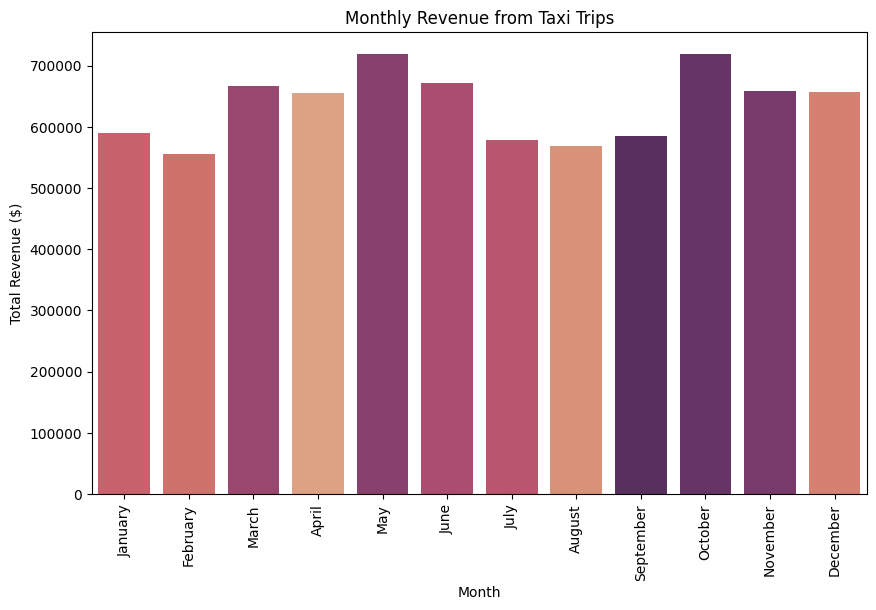

In [531]:

plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_month',y='total_amount', data=monthly_revenue, order=month_order, palette='flare', hue = 'pickup_month', legend = False)

plt.title('Monthly Revenue from Taxi Trips')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [533]:
# Define a function to map months to quarters
def get_quarter(month):
    if month in ['January', 'February', 'March']:
        return 'Q1'
    elif month in ['April', 'May', 'June']:
        return 'Q2'
    elif month in ['July', 'August', 'September']:
        return 'Q3'
    elif month in ['October', 'November', 'December']:
        return 'Q4'
    else:
        return 'Unknown'
monthly_revenue['quarter'] = monthly_revenue['pickup_month'].apply(get_quarter)
print(monthly_revenue)

   pickup_month  total_amount quarter
0         April     655916.33      Q2
1        August     567834.66      Q3
2      December     657382.77      Q4
3      February     555603.13      Q1
4       January     589263.40      Q1
5          July     578663.71      Q3
6          June     671635.64      Q2
7         March     666352.14      Q1
8           May     718618.36      Q2
9      November     658834.79      Q4
10      October     718889.29      Q4
11    September     585627.09      Q3


  quarter  total_amount  proportion
0      Q1    1811218.67    0.237549
1      Q2    2046170.33    0.268364
2      Q3    1732125.46    0.227175
3      Q4    2035106.85    0.266913


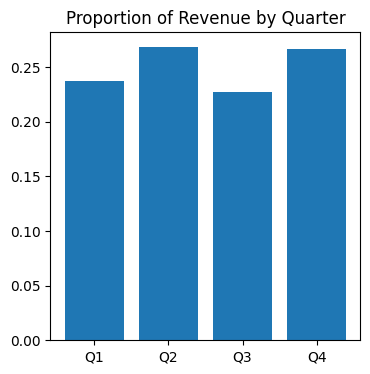

In [535]:
# Calculate proportion of each quarter
quarterly_revenue = monthly_revenue.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue
print(quarterly_revenue)

plt.figure(figsize=(4, 4))
plt.bar(quarterly_revenue['quarter'], quarterly_revenue['proportion'])
plt.title('Proportion of Revenue by Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [537]:
# Show how trip fare is affected by distance
df_filtered = df[df['trip_distance'] != 0]
df_filtered.shape

(262475, 23)

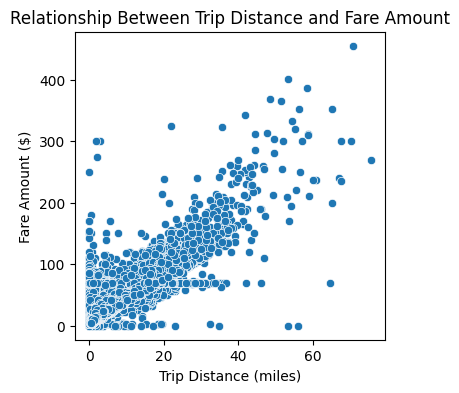

In [539]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount and tripduration: 0.28


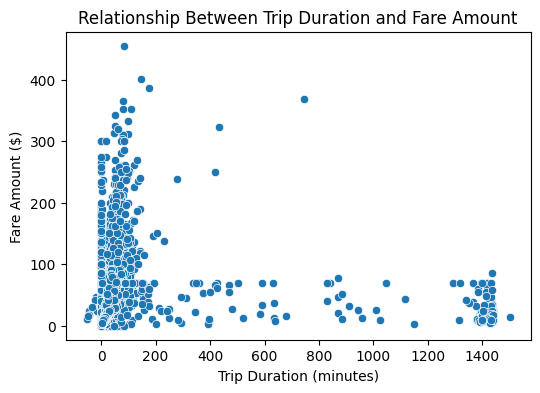

In [541]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between fare_amount and tripduration: {correlation:.2f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df)
plt.title('Relationship Between Trip Duration and Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

Correlation between fare_amount and passenger_count: 0.05


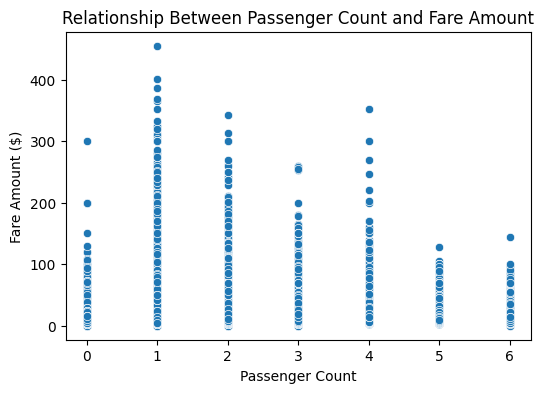

In [542]:
# Show relationship between fare and number of passengers
correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between fare_amount and passenger_count: {correlation:.2f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Relationship Between Passenger Count and Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

Correlation between tip_amount and trip_distance: 0.58


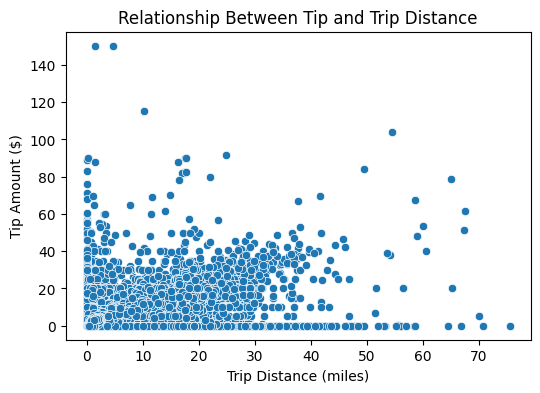

In [544]:
# Show relationship between tip and trip distance
correlation = df['tip_amount'].corr(df['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation:.2f}")

plt.figure(figsize=(6,4))
sns.scatterplot(x= 'trip_distance', y='tip_amount', data=df)
plt.title('Relationship Between Tip and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

   payment_type   count
0             1  216514
1             2   45990
2             4    1972
3             3    1281


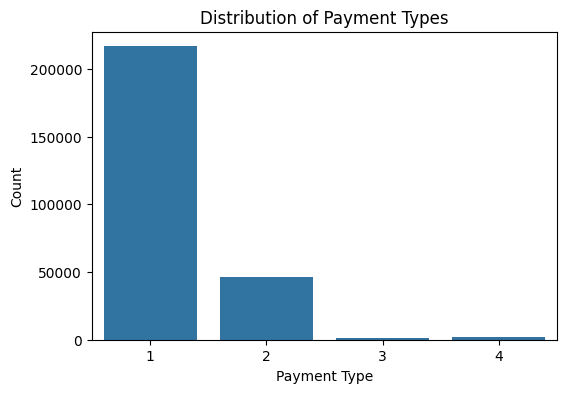

In [547]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df['payment_type'].value_counts().reset_index()
print(payment_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x='payment_type',y= 'count', data= payment_counts)

plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



   payment_type   count payment_type_name
0             1  216514       Credit card
1             2   45990              Cash
2             4    1972           Dispute
3             3    1281         No charge


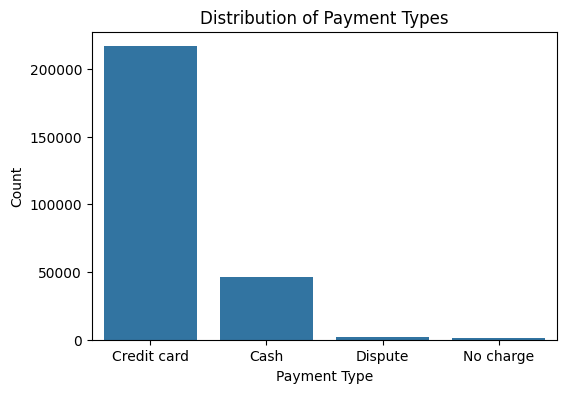

In [549]:
payment_type_mapping = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}
payment_counts['payment_type_name'] = payment_counts['payment_type'].map(payment_type_mapping)
print(payment_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x='payment_type_name',y= 'count', data= payment_counts)

plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [180]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [551]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('Datasets and Dictionary/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

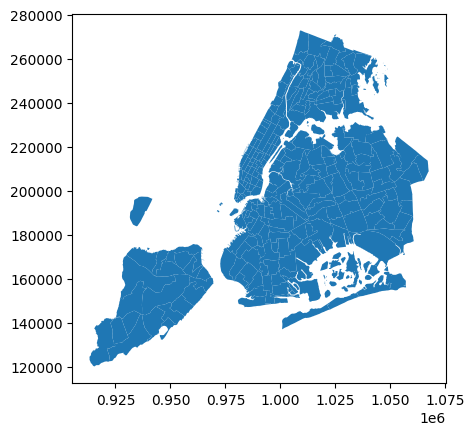

In [553]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [555]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on = 'PULocationID', right_on= 'LocationID', how= 'left')
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-26 16:17:15   2023-12-26 16:33:10              2.0   
1         2  2023-11-15 11:25:08   2023-11-15 11:51:39              1.0   
2         2  2023-11-26 19:33:45   2023-11-26 19:38:59              1.0   
3         2  2023-11-08 12:42:07   2023-11-08 13:21:00              1.0   
4         1  2023-02-15 10:25:29   2023-02-15 10:50:43              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.86         1.0                  N            13            48   
1          12.12         1.0                  N            70           132   
2           0.73         1.0                  N           162           237   
3          11.51         1.0                  N           161           138   
4           1.40         1.0                  N           186           170   

   payment_type  ...  pickup_day_of_week  pickup_month  trip_duration  \
0             1  ...             Tuesday      December      15.916667   
1             1  ...           Wednesday      November      26.516667   
2             1  ...              Sunday      November       5.233333   
3             1  ...           Wednesday      November      38.883333   
4             1  ...           Wednesday      February      25.233333   

   OBJECTID  Shape_Leng  Shape_Area                          zone  LocationID  \
0      13.0    0.050281    0.000149             Battery Park City        13.0   
1      70.0    0.063840    0.000195                 East Elmhurst        70.0   
2     162.0    0.035270    0.000048                  Midtown East       162.0   
3     161.0    0.035804    0.000072                Midtown Center       161.0   
4     186.0    0.024696    0.000037  Penn Station/Madison Sq West       186.0   

     borough                                           geometry  
0  Manhattan  POLYGON ((980801.31 201248.869, 980697.386 200...  
1     Queens  POLYGON ((1023276.361 216661.299, 1023320.055 ...  
2  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...  
3  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...  
4  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...  

[5 rows x 31 columns]

In [557]:
merged_df.info()
merged_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265778 entries, 0 to 265777
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265778 non-null  int64         
 1   tpep_pickup_datetime   265778 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265778 non-null  datetime64[us]
 3   passenger_count        265778 non-null  float64       
 4   trip_distance          265778 non-null  float64       
 5   RatecodeID             265778 non-null  float64       
 6   store_and_fwd_flag     265778 non-null  object        
 7   PULocationID           265778 non-null  int64         
 8   DOLocationID           265778 non-null  int64         
 9   payment_type           265778 non-null  int64         
 10  fare_amount            265778 non-null  float64       
 11  extra                  265778 non-null  float64       
 12  mta_tax                265778 non-null  floa

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee                 0
pickup_date                 0
pickup_hour                 0
pickup_day_of_week          0
pickup_month                0
trip_duration               0
OBJECTID                 2683
Shape_Leng               2683
Shape_Area               2683
zone                     2683
LocationID               2683
borough                  2683
geometry                 2683
dtype: int64

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [559]:
# Group data by location and calculate the number of trips
total_number_of_trips_per_location = merged_df.groupby('PULocationID').size().reset_index(name='trip_count')
print(total_number_of_trips_per_location)

     PULocationID  trip_count
0               1          37
1               3          10
2               4         261
3               5           2
4               6           3
..            ...         ...
237           261        1399
238           262        3346
239           263        5068
240           264        2532
241           265         150

[242 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [561]:
# Merge trip counts back to the zones GeoDataFrame
merged_zones = pd.merge(zones,total_number_of_trips_per_location, left_on= 'LocationID', right_on= 'PULocationID', how= 'left' )
merged_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0        37.0  
1           NaN         NaN  
2           3.0        10.0  
3           4.0       261.0  
4           5.0         2.0

In [563]:
merged_zones['trip_count'] = merged_zones['trip_count'].fillna(0)
# merged_zones['trip_count'].isnull().sum()
merged_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0        37.0  
1           NaN         0.0  
2           3.0        10.0  
3           4.0       261.0  
4           5.0         2.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

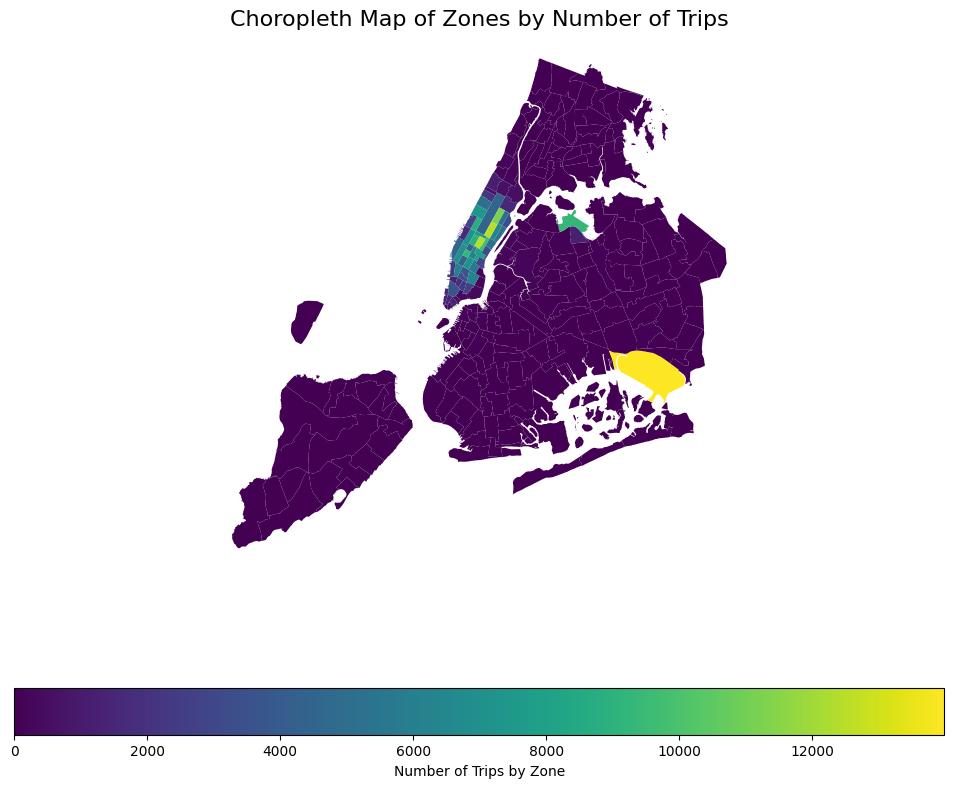

In [565]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
merged_zones.plot(column = 'trip_count',
ax = ax,
legend = True,
legend_kwds = {'label': "Number of Trips by Zone", 'orientation': "horizontal"})
ax.set_title("Choropleth Map of Zones by Number of Trips", fontsize=16)
ax.set_axis_off()
plt.show()


131              JFK Airport
236    Upper East Side South
160           Midtown Center
235    Upper East Side North
161             Midtown East
Name: zone, dtype: object


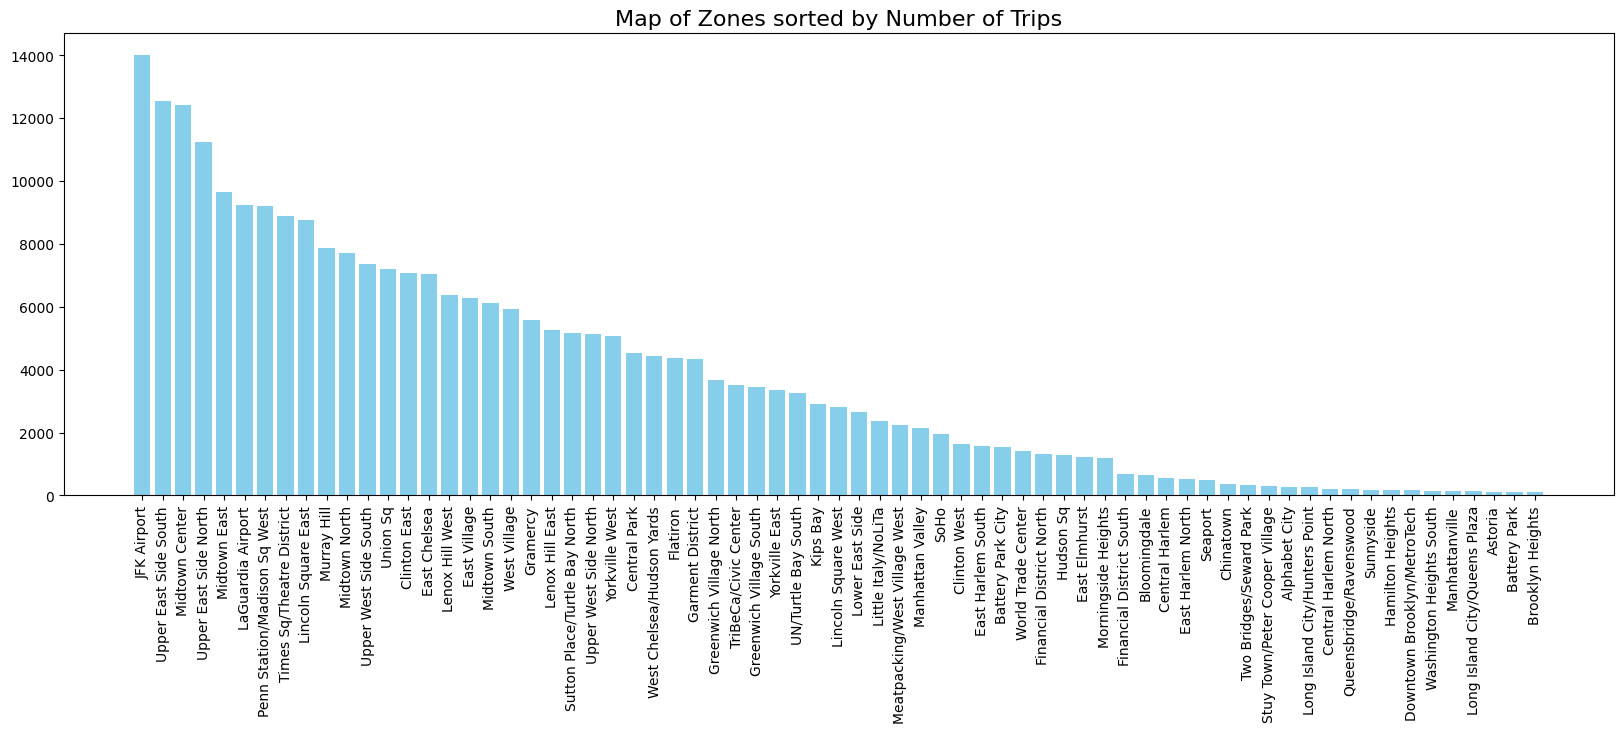

In [825]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = merged_zones.sort_values(by='trip_count', ascending=False)

sorted_zones_trip_count = sorted_zones[sorted_zones['trip_count'] > 100].sort_values(by='trip_count', ascending=False)
print(sorted_zones_trip_count['zone'].head())
plt.figure(figsize=(20, 6))
plt.bar(sorted_zones_trip_count['zone'], sorted_zones_trip_count['trip_count'], color='skyblue')
plt.title("Map of Zones sorted by Number of Trips", fontsize=16)
plt.xticks(rotation=90)
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [569]:
# Find routes which have the slowest speeds at different times of the day
clean_df = merged_df[merged_df['trip_distance'] > 0]

route_hourly = clean_df.groupby(['PULocationID', 'DOLocationID','pickup_hour']).agg(avg_trip_duration=('trip_duration', 'mean'),total_distance=('trip_distance', 'sum')).reset_index()
#print(route_hourly.head())
route_hourly = route_hourly[route_hourly['avg_trip_duration'] > 0]


route_hourly['speed']= route_hourly['total_distance'] / route_hourly['avg_trip_duration']
#print(route_hourly.tail())

slowest_routes = route_hourly.sort_values(by='speed', ascending=True)
print(slowest_routes.head())


       PULocationID  DOLocationID  pickup_hour  avg_trip_duration  \
60865           264           237           15          55.766667   
43145           209           232           13        1431.883333   
16718           113           235           22         349.233333   
5132             50            43            8        1431.333333   
22275           134           265           15          81.266667   

       total_distance     speed  
60865            0.04  0.000717  
43145            1.04  0.000726  
16718            0.28  0.000802  
5132             1.42  0.000992  
22275            0.10  0.001231  


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

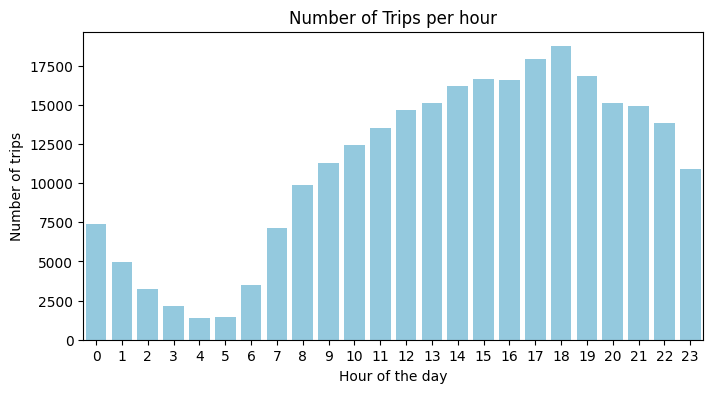

Busiest Hour is at 18 hour, with trip of : 18730


In [238]:
# Visualise the number of trips per hour and find the busiest hour
busiest_hour = merged_df['pickup_hour'].value_counts().sort_index(ascending=True).reset_index(name= 'trip_count')

plt.figure(figsize=(8,4))

sns.barplot(x=busiest_hour['pickup_hour'], y=busiest_hour['trip_count'], color= 'skyblue')
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.title('Number of Trips per hour')
plt.show()
print('Busiest Hour is at',merged_df.groupby('pickup_hour').size().idxmax(), 'hour, with trip of :',merged_df.groupby('pickup_hour').size().max())

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [250]:
# Scale up the number of trips
top5_busiest_trip = busiest_hour.sort_values(by='trip_count', ascending = False).head()
#print(top5_busiest_trip.head())
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.008
top5_busiest_trip['trip_count'] = top5_busiest_trip['trip_count']/sample_fraction
print(top5_busiest_trip)


    pickup_hour  trip_count
18           18   2341250.0
17           17   2237375.0
19           19   2103500.0
15           15   2078875.0
16           16   2075625.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

  day_type  trip_distance
0  Weekday      659188.18
1  Weekend      253700.26


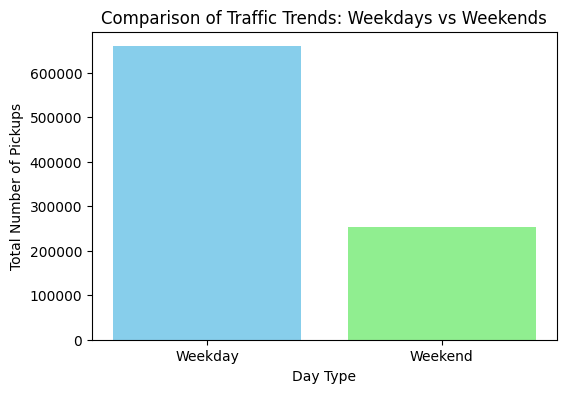

In [571]:
# Compare traffic trends for the week days and weekends
df['day_type'] = df['pickup_day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
traffic_trend = df.groupby('day_type')['trip_distance'].sum().reset_index()

print(traffic_trend)

plt.figure(figsize=(6, 4))
plt.bar(x='day_type', height='trip_distance', data = traffic_trend, color=['skyblue', 'lightgreen'])

# Labels & Formatting
plt.title('Comparison of Traffic Trends: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Total Number of Pickups')

plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

The data shows total trip distance is higher on weekdays compared to weekends. 
Weekdays are busiest, might be due to work. 

finding busy and quiet hours helps to plan for the city travel and traffic management. For taxi drivers, maximizing the earnings by surge pricing. higher the demand, higher the fares. 

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [573]:
# Find top 10 pickup and dropoff zones
pickup_zones = df['PULocationID'].value_counts()
print("Top 10 pickup zones:",pickup_zones.head(10))
dropoff_zones = df['DOLocationID'].value_counts()
print("Top 10 dropoff zones", dropoff_zones.head(10))

Top 10 pickup zones: PULocationID
132    13992
237    12555
161    12426
236    11244
162     9636
138     9247
186     9193
230     8885
142     8770
170     7864
Name: count, dtype: int64
Top 10 dropoff zones DOLocationID
236    11873
237    11146
161    10398
230     8100
170     7912
162     7608
142     7540
239     7375
141     6988
68      6761
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [575]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zone_ratio = pd.DataFrame({'Pickups': pickup_zones, 'Dropoffs': dropoff_zones})
zone_ratio['pickup/drop'] = zone_ratio['Pickups']/zone_ratio['Dropoffs']
zone_ratio.isnull().sum()
zone_ratio.dropna(inplace=True)
zone_ratio = zone_ratio.sort_values(by = 'pickup/drop', ascending= False)

print("Top 10 Highest Pickup/Dropoff Ratios:\n", zone_ratio.head(10))
print("Top 10 Lowest Pickup/Dropoff Ratios:\n", zone_ratio.tail(10))

Top 10 Highest Pickup/Dropoff Ratios:
      Pickups  Dropoffs  pickup/drop
70    1223.0       148     8.263514
132  13992.0      2966     4.717465
138   9247.0      3179     2.908776
186   9193.0      5979     1.537548
249   5920.0      4328     1.367837
43    4514.0      3309     1.364158
114   3441.0      2582     1.332688
162   9636.0      7608     1.266562
161  12426.0     10398     1.195038
234   7212.0      6049     1.192263
Top 10 Lowest Pickup/Dropoff Ratios:
      Pickups  Dropoffs  pickup/drop
178      1.0        20     0.050000
133      4.0        80     0.050000
1       37.0       746     0.049598
37      13.0       271     0.047970
101      1.0        21     0.047619
227      2.0        42     0.047619
112     27.0       596     0.045302
252      2.0        52     0.038462
64       1.0        28     0.035714
257      4.0       114     0.035088


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [577]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

pickup_zones = night_df['PULocationID'].value_counts()
print("Top 10 pickup zones:\n",pickup_zones.head(10))
dropoff_zones = night_df['DOLocationID'].value_counts()
print("Top 10 dropoff zones\n", dropoff_zones.head(10))


Top 10 pickup zones:
 PULocationID
79     2256
132    2127
249    1842
48     1479
148    1411
230    1239
114    1222
186    1032
138     901
164     886
Name: count, dtype: int64
Top 10 dropoff zones
 DOLocationID
79     1240
48     1034
170     912
68      857
107     856
141     772
263     746
249     689
236     668
90      664
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [579]:
# Filter for night hours (11 PM to 5 AM)
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
night_revenue = night_df['total_amount'].sum()

# Filter for day hours (6 AM to 10 PM)
day_df = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]
day_revenue = day_df['total_amount'].sum()

total_revenue = df['total_amount'].sum()

print("Day time revenue share =",(day_revenue/total_revenue)*100)
print("Night time revenue share =",(night_revenue/total_revenue)*100)

Day time revenue share = 87.82137207537731
Night time revenue share = 12.178627924622699


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [585]:
# Analyse the fare per mile per passenger for different passenger counts
df_filtered = df[(df['passenger_count'] > 0) & (df['trip_distance'] > 0)].copy()

df_filtered['avg_fare_per_mile'] = df_filtered['total_amount']/df_filtered['trip_distance']
df_filtered['avg_fare_per_passenger'] = df_filtered['avg_fare_per_mile']/df_filtered['passenger_count']

fare_per_mile_per_passenger = df_filtered.groupby('passenger_count')['avg_fare_per_passenger'].mean().reset_index()
print(fare_per_mile_per_passenger)

   passenger_count  avg_fare_per_passenger
0              1.0               16.572669
1              2.0                9.470965
2              3.0                5.668200
3              4.0                6.792084
4              5.0                2.657453
5              6.0                2.091552


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [595]:
# Compare the average fare per mile for different days and for different times of the day
avg_fare_per_mile_per_days = df_filtered.groupby('pickup_day_of_week')['avg_fare_per_mile'].mean().reset_index()
print(avg_fare_per_mile_per_days)

avg_fare_per_mile_per_times = df_filtered.groupby('pickup_hour')['avg_fare_per_mile'].mean().reset_index()
print(avg_fare_per_mile_per_times)


  pickup_day_of_week  avg_fare_per_mile
0             Friday          15.722129
1             Monday          16.373099
2           Saturday          16.369901
3             Sunday          17.054162
4           Thursday          18.718170
5            Tuesday          17.450515
6          Wednesday          17.714436
    pickup_hour  avg_fare_per_mile
0             0          17.513972
1             1          20.754400
2             2          13.859756
3             3          15.704386
4             4          29.703328
5             5          17.945133
6             6          13.695912
7             7          12.839602
8             8          14.635257
9             9          15.147652
10           10          15.608291
11           11          16.397244
12           12          16.481971
13           13          17.625839
14           14          17.856554
15           15          16.654067
16           16          21.747133
17           17          19.530381
18           18

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [601]:
# Compare fare per mile for different vendors
avg_fare_per_mile_per_vendors = df_filtered.groupby('VendorID')['avg_fare_per_mile'].mean().reset_index()
print(avg_fare_per_mile_per_vendors)


   VendorID  avg_fare_per_mile
0         1          13.178550
1         2          18.396439


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [614]:
# Defining distance tiers
df_filtered['distance_tiers'] = df_filtered['trip_distance'].apply(lambda x: '0-2 miles' if x <= 2 else '2-5 miles' if x <= 5 else '5+ miles')

avg_fare_per_mile_per_vendors_distance = df_filtered.groupby(['VendorID','distance_tiers'])['avg_fare_per_mile'].mean().reset_index()

print(avg_fare_per_mile_per_vendors_distance)


   VendorID distance_tiers  avg_fare_per_mile
0         1      0-2 miles          17.005145
1         1      2-5 miles           9.179044
2         1       5+ miles           5.953413
3         2      0-2 miles          26.862654
4         2      2-5 miles           9.480388
5         2       5+ miles           6.175065


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

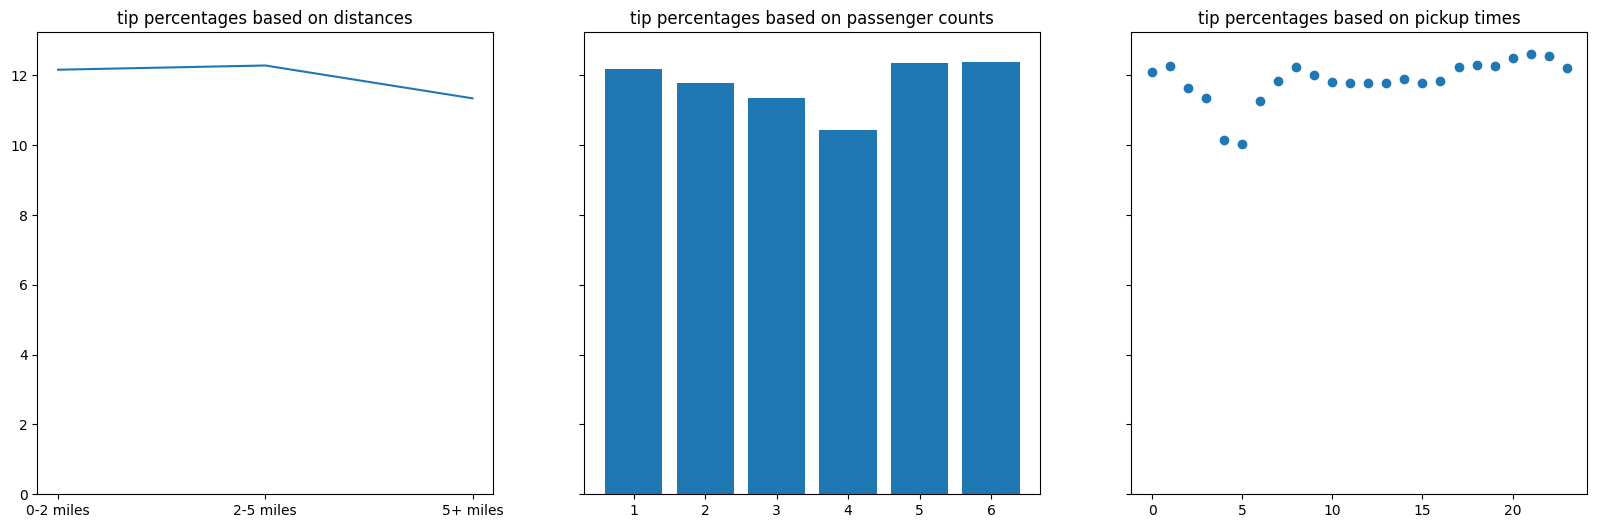

In [652]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_filtered['tip_percentage'] = df_filtered['tip_amount']/ df_filtered['total_amount'] * 100

tip_by_distance = df_filtered.groupby('distance_tiers')['tip_percentage'].mean().reset_index()
tip_by_passenger = df_filtered.groupby('passenger_count')['tip_percentage'].mean().reset_index()
tip_by_hour = df_filtered.groupby('pickup_hour')['tip_percentage'].mean().reset_index()


fig, ax = plt.subplots(ncols=3, figsize=(20, 6), sharey=True)

distance, = ax[0].plot(tip_by_distance['distance_tiers'], tip_by_distance['tip_percentage'])
distance.set_label("distance_tiers")
ax[0].set_title('tip percentages based on distances')

passenger = ax[1].bar(tip_by_passenger['passenger_count'], tip_by_passenger['tip_percentage'])
passenger.set_label("passenger_count")
ax[1].set_title('tip percentages based on passenger counts')

hour = ax[2].scatter(tip_by_hour['pickup_hour'], tip_by_hour['tip_percentage'])
hour.set_label("pickup_hour")
ax[2].set_title('tip percentages based on pickup times')

plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

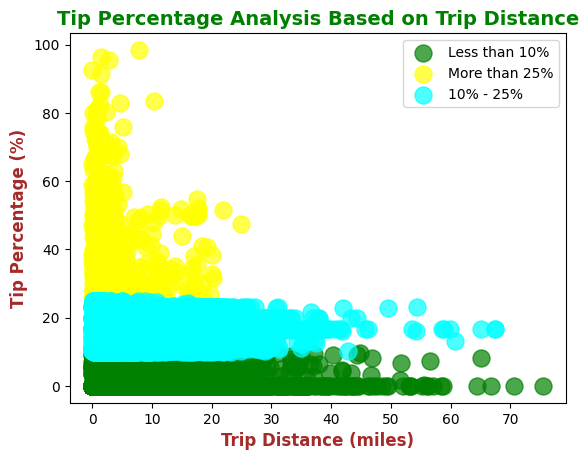

In [667]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_filtered['tip_percentage_tiers'] = df_filtered['tip_percentage'].apply(lambda x: 'less than 10 perc' if x < 10 else '25+ perc' if x > 25 else '10 - 25 perc')

low_tips = df_filtered[df_filtered['tip_percentage_tiers'] == "less than 10 perc"]
plt.scatter(low_tips['trip_distance'], low_tips['tip_percentage'], 
            c='green', alpha=0.7, s=150, label="Less than 10%")


high_tips = df_filtered[df_filtered['tip_percentage_tiers'] == "25+ perc"]
plt.scatter(high_tips['trip_distance'], high_tips['tip_percentage'], 
            c='yellow', alpha=0.7, s=150, label="More than 25%")

mid_tips = df_filtered[df_filtered['tip_percentage_tiers'] == "10 - 25 perc"]
plt.scatter(mid_tips['trip_distance'], mid_tips['tip_percentage'], 
            c='cyan', alpha=0.7, s=150, label="10% - 25%")

plt.title("Tip Percentage Analysis Based on Trip Distance", fontsize=14, fontweight='bold', color='green')
plt.xlabel("Trip Distance (miles)", fontsize=12, fontweight='bold', color='brown')
plt.ylabel("Tip Percentage (%)", fontsize=12, fontweight='bold', color='brown')

plt.legend()

plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

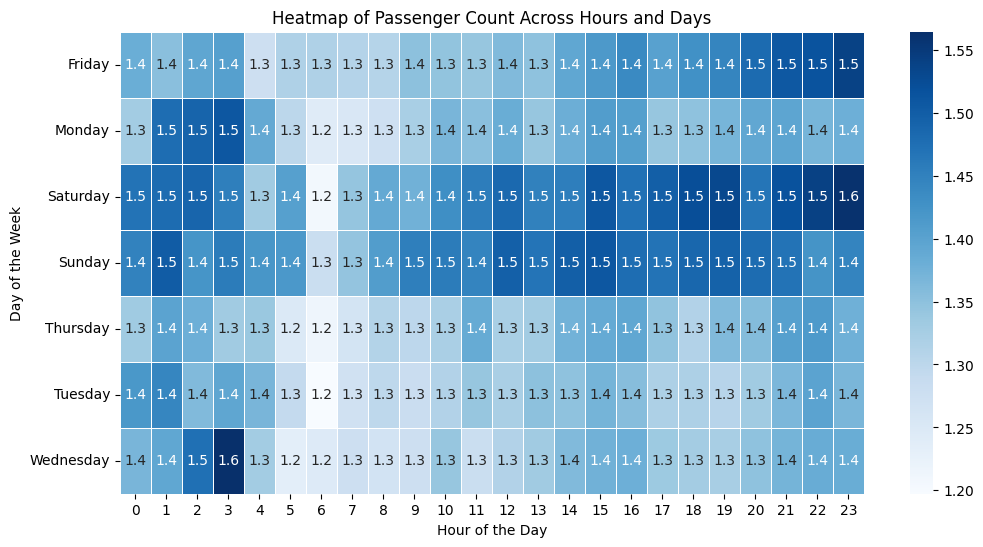

In [685]:
# See how passenger count varies across hours and days

passenger_pivot = df_filtered.pivot_table(index='pickup_day_of_week', columns='pickup_hour', values='passenger_count', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_pivot, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Passenger Count Across Hours and Days")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

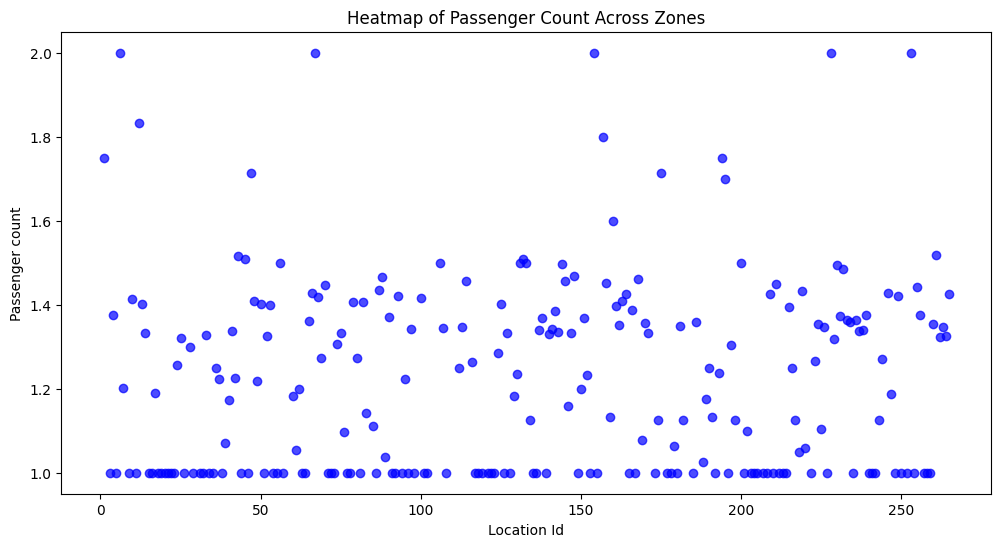

In [717]:
# How does passenger count vary across zones
passenger_zone = df_filtered.groupby('PULocationID')['passenger_count'].mean().reset_index()
passenger_zone = passenger_zone.sort_values(by='passenger_count', ascending=False)

plt.figure(figsize=(12, 6))
plt.scatter(passenger_zone['PULocationID'], passenger_zone['passenger_count'], alpha=0.7, color='blue')
plt.xlabel("Location Id")
plt.ylabel("Passenger count")
plt.title("Heatmap of Passenger Count Across Zones")
plt.show()


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   avg_passenger_count  
0             1.750000  
1             0.000000  
2             1.000000  
3             1.

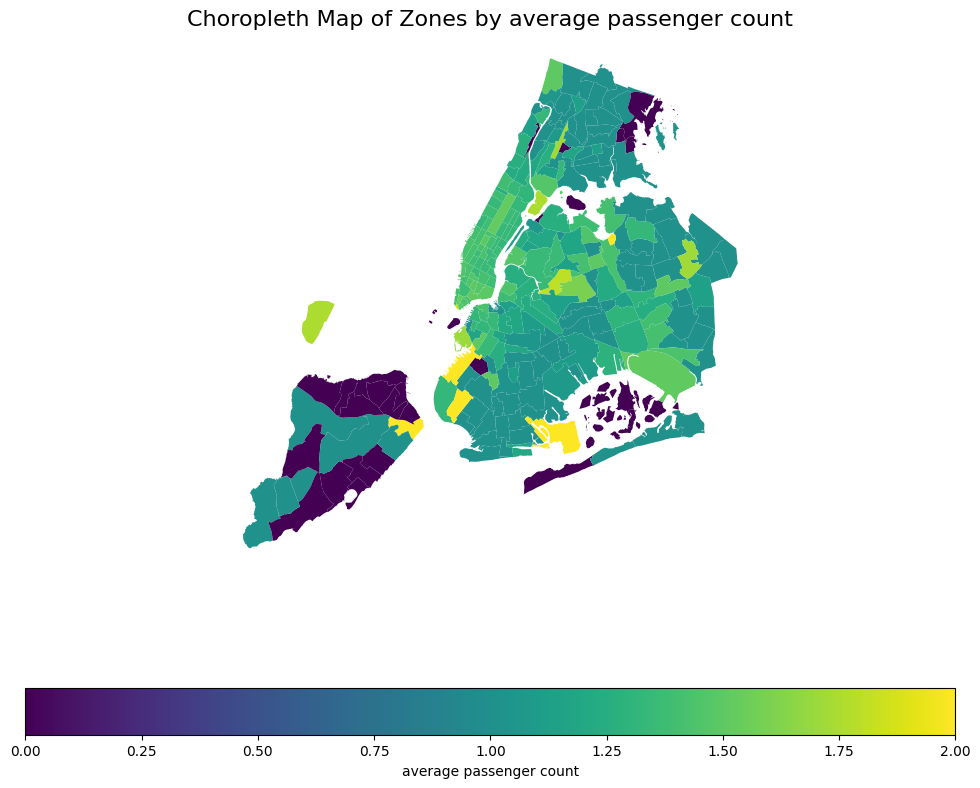

In [723]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zone_passenger_counts = df_filtered.groupby('PULocationID')['passenger_count'].mean().reset_index()
zone_passenger_counts.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'}, inplace=True)

zones_with_trips = pd.merge(zones,zone_passenger_counts, on="LocationID", how="left")
zones_with_trips.fillna({'avg_passenger_count':0}, inplace=True)
print(zones_with_trips.head())

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones_with_trips.plot(column = 'avg_passenger_count',
ax = ax,
legend = True,
legend_kwds = {'label': "average passenger count", 'orientation': "horizontal"})
ax.set_title("Choropleth Map of Zones by average passenger count", fontsize=16)
ax.set_axis_off()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

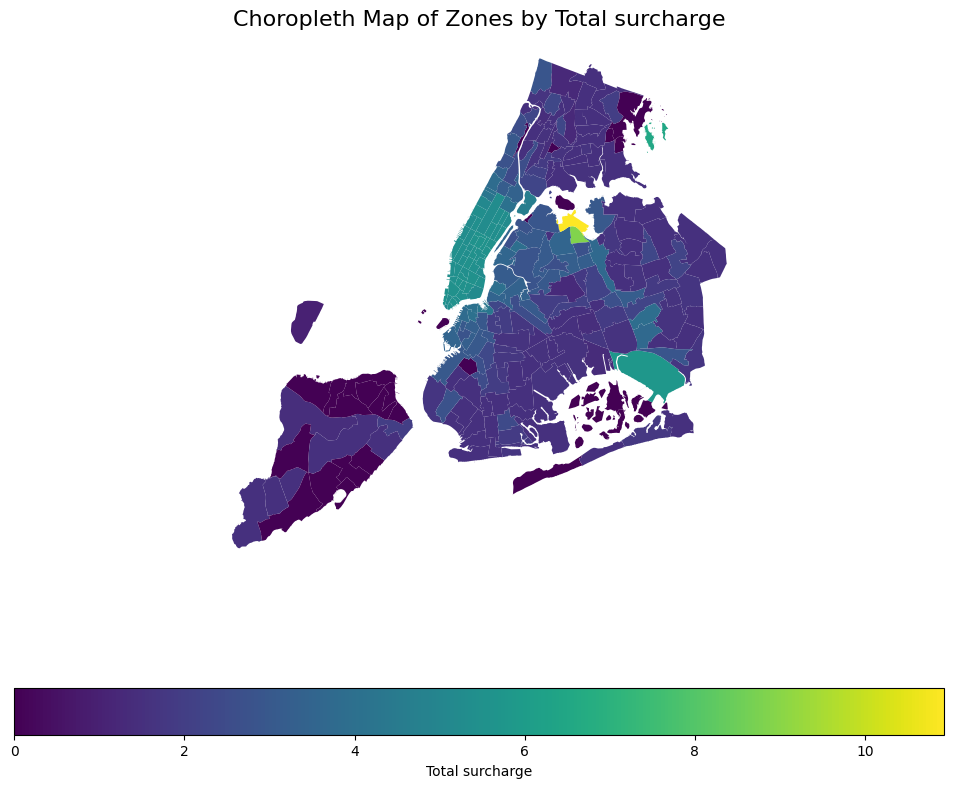

In [799]:
# How often is each surcharge applied?
surcharge_columns = ['extra', 'mta_tax', 'congestion_surcharge', 'improvement_surcharge', 'Airport_fee']

df_surcharge = df_filtered.groupby('PULocationID')[surcharge_columns].mean().reset_index() # grouped by the location id
df_surcharge['Total_surcharge'] = df_surcharge[surcharge_columns].sum(axis=1) # created a column to add the total surcharge
df_surcharge.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

zones_with_surcharge = pd.merge(zones,df_surcharge, on="LocationID", how="left")
zones_with_surcharge.fillna({'Total_surcharge':0}, inplace=True)

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones_with_surcharge.plot(column = 'Total_surcharge',
ax = ax,
legend = True,
legend_kwds = {'label': "Total surcharge", 'orientation': "horizontal"})
ax.set_title("Choropleth Map of Zones by Total surcharge", fontsize=16)
ax.set_axis_off()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Demand in the following area is higher than the rest of the city. Drivers shall be guided to these zones with demand surges.
    131              JFK Airport
    236    Upper East Side South
    160           Midtown Center
    235    Upper East Side North
Implement a system to pre position the cabs in the high traffic area during the peak hours based on the historical data.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Ensuring the cab preposition and availability in the airports (eg. JFK) especially during the flight arrival windows can help reduce the wait times and improve the trip frequency
2. The improved cab availability in business areas during weekdays to help office customers.
3. The improved cab availability in entertainment areas during friday and weekends when the demand is more.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1. Time based fare adjustment by increasing the fare slightly in peak hours and discounts during the low demand period to attract more services
2. Adjust the price per mile for the mid range trips while maintaining the profit for the long distance trip